<a href="https://colab.research.google.com/github/RemyLpr/defi_ia/blob/main/feature_engineering/coeff_lang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import des librairies et des données

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("train_set.csv") # issu du notebook req_api
df_vienna = pd.read_csv("vienna.csv")
df_vilnius = pd.read_csv("vilnius.csv")
df_amsterdam = pd.read_csv("amsterdam.csv")
df_rome = pd.read_csv("rome.csv")
df_valletta = pd.read_csv("valletta.csv")
df_paris = pd.read_csv("paris.csv")
df_madrid = pd.read_csv("madrid.csv")
df_copenhagen = pd.read_csv("copenhagen.csv")
df_sofia = pd.read_csv("sofia.csv")
df_hung = pd.concat([df_vienna, df_vilnius, df_amsterdam, df_rome, df_valletta, df_paris, df_madrid, df_copenhagen, df_sofia])

# Calcul des coefficients

In [86]:
languages = df["language"].unique().tolist()
languages.remove("hungarian")
data = []
data2 = []
for lang in languages:
  df_lang = df[df["language"] == lang]
  cities = df["city"].unique().tolist()
  for city in cities:
    coeff_list = []
    df_lang_city = df_lang[df_lang["city"] == city]
    df_hung_city = df_hung[df_hung["city"] == city]
    for index, row in df_lang_city.iterrows():
      hotel, date = row["hotel_id"], row["date"]
      df_match = df_hung_city[(df_hung_city["hotel_id"] == hotel) & (df_hung_city["date"] == date)]
      for index2, row2 in df_match.iterrows():
        if (date <=2) and (abs(row["price"]*0.92 - np.mean(coeff_list) < abs(row["price"] - np.mean(coeff_list)))):
          pass
        else:
          coeff_list.append(row["price"]/row2["price"])
    data2.append(coeff_list)
    coeff_list = np.array(coeff_list)
    coeff = round(np.mean(coeff_list), 2)
    data.append((lang, city, coeff))
df_coeff = pd.DataFrame(data = data, columns = ["language", "city", "coeff"])

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Visualisation des résultats

(array([ 49.,  14.,  38.,  83., 116.,  89.,  39.,   8.,  20.,   9.]),
 array([1.07017544, 1.07274694, 1.07531843, 1.07788993, 1.08046143,
        1.08303292, 1.08560442, 1.08817592, 1.09074742, 1.09331891,
        1.09589041]),
 <a list of 10 Patch objects>)

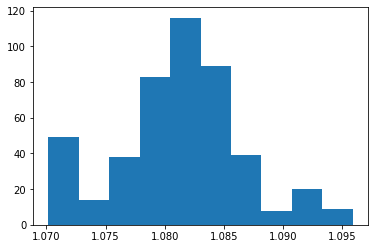

In [104]:
plt.hist(data2[1])

# Export des résultats

In [99]:
df_coeff.to_csv("coeff_lang.csv", index = False)